In [7]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torch.nn as nn

n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [2]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [3]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [4]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], legend=['train', 'test'])
    for epoch in range(1, num_epochs + 1):
        for X, y in train_iter:
            with torch.enable_grad():
                # The L2 norm penalty term has been added, and broadcasting
                # makes l2_penalty(w) a vector whose length is batch_size
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if epoch % 5 == 0:
            animator.add(epoch, (d2l.evaluate_loss(net, train_iter, loss),
                                 d2l.evaluate_loss(net, test_iter, loss)))
    print('l1 norm of w:', torch.norm(w).item())

l1 norm of w: 13.442643165588379


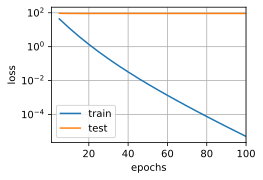

In [5]:
train(lambd=0)

l1 norm of w: 0.3936167061328888


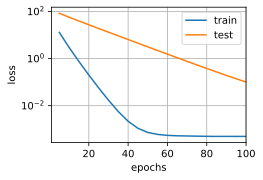

In [6]:
train(lambd=3)

`train2` returns (train_acc, test_acc)

In [10]:
def train2(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    for epoch in range(1, num_epochs + 1):
        for X, y in train_iter:
            with torch.enable_grad():
                # The L2 norm penalty term has been added, and broadcasting
                # makes l2_penalty(w) a vector whose length is batch_size
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
    return (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss))

In [14]:
train_losses = []
test_losses = []
for lambd in range(20):
    train_loss, test_loss = train2(lambd)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

In [15]:
train_losses

[1.4363741138367914e-05,
 0.00011812190641649067,
 0.00036244652583263817,
 0.0006307375617325306,
 0.003912659361958504,
 0.0021399850375019014,
 0.0024136831052601337,
 0.005793318152427673,
 0.002130027604289353,
 0.003739229962229729,
 0.0034953163471072913,
 0.0029081628657877446,
 0.0032489076256752014,
 0.004294885043054819,
 0.007120271027088165,
 0.00493181332712993,
 0.004374715872108937,
 0.0039916688343510035,
 0.004080380033701658,
 0.004572108248248696]

In [16]:
test_losses

[71.35315269470215,
 7.534568219184876,
 0.5064810961484909,
 0.0715823195874691,
 0.04289342377334833,
 0.013520227242261172,
 0.010434670289978385,
 0.025160817205905916,
 0.007191698979586363,
 0.017911725472658874,
 0.008081771954894066,
 0.007125182785093784,
 0.009350363556295633,
 0.014196811001747847,
 0.013173851668834686,
 0.014788482449948787,
 0.007056017741560936,
 0.007978353919461369,
 0.007409658161923289,
 0.006917940201237798]